<a href="https://colab.research.google.com/github/Joannalius/Joannalius/blob/main/Binary_SVM_with_balanced_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary SVM with balanced sample

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv


# Binary: no award & award

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
xtrain= pd.read_csv("xtrain.csv")
xtest= pd.read_csv("xtest.csv")
ytrain= pd.read_csv("ytrain.csv")
ytest= pd.read_csv("ytest.csv")
ytrain= np.where(ytrain == 0, 0, 1)
ytest= np.where(ytest == 0, 0, 1)
print(xtrain.info(),xtrain.isnull().sum(), xtrain.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36545 entries, 0 to 36544
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating_count             36545 non-null  float64
 1   number_of_pages          36545 non-null  float64
 2   one_star_ratio           36545 non-null  float64
 3   five_stars_ratio         36545 non-null  float64
 4   author_award_count       36545 non-null  float64
 5   publisher_award_count    36545 non-null  float64
 6   genre_award_count        36545 non-null  float64
 7   recommended_books_count  36545 non-null  float64
 8   books_in_series_count    36545 non-null  float64
dtypes: float64(9)
memory usage: 2.5 MB
None rating_count               0
number_of_pages            0
one_star_ratio             0
five_stars_ratio           0
author_award_count         0
publisher_award_count      0
genre_award_count          0
recommended_books_count    0
books_in_series_count

#  Finding the optimal parameters and train

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt

#hyperparameters fit
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distributions = {
    'C': [1, 10, 100, 1000],
    'gamma': [1, 10, 100, 1000],
    'class_weight': ['balanced'],
    'kernel': ['rbf']
}


svc = SVC()

random_search = RandomizedSearchCV(
    svc, param_distributions, n_iter=3,
    cv=2, verbose=2, random_state=42, n_jobs=-1
)

random_search.fit(xtrain, ytrain)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters: {'kernel': 'rbf', 'gamma': 10, 'class_weight': 'balanced', 'C': 10}
Best score: 0.8391845541228515


#  Test


In [ ]:
optimized_svc = SVC(**random_search.best_params_)
optimized_svc.fit(xtrain, ytrain)

predictions = optimized_svc.predict(xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


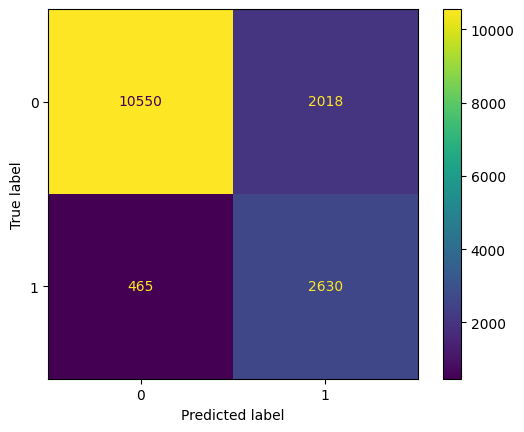

In [ ]:

#%%
ypred = optimized_svc.predict(xtest)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=optimized_svc.classes_)
disp.plot()
plt.show()

# Accuracy and F1 score


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# calculate metrics
accuracy  = accuracy_score(ytest, ypred)
f1 = f1_score(ytest, ypred, average='binary')

# prnt results
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Accuracy: 0.8414735363595736
F1 Score: 0.6793232597184553
